# Data Exploration - Raster
## Imports

Wie bereits im Notebook DataExploration_Absolute_and_Relative_Endpoints beschrieben ist der Startpunkt nicht optimal. Der folgende Plot zeigt dies noch einmal.

In [84]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Helpers
from matplotlib.pyplot import figure

sns.set_style("whitegrid")
colors = {0:'tab:blue',1:'tab:orange',2:'tab:green'}

<Figure size 800x800 with 0 Axes>

In [2]:
with open('data.pickle', 'rb') as handle:
    data = pickle.load(handle)

df = pd.read_pickle("data.pickle")

In [3]:
#Create a new Datafram for start and endpoints of spiral search only
start_end_points = Helpers.get_dataframe_for_start_end_points()

In [4]:
# Starting and endpoints of all runs - Spiral search only - relative (delta) values
start_end_points = Helpers.get_relative_start_end_points(df, start_end_points)

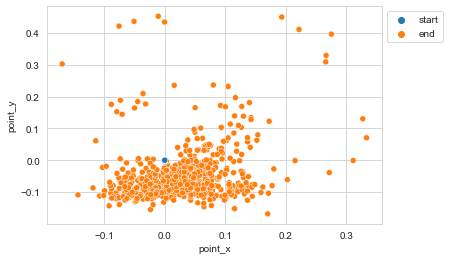

In [5]:
sns_plot = sns.scatterplot(data=start_end_points, x="point_x", y="point_y", hue="start_or_end")
sns_plot.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), ncol=1)
plt.show()

## Bestimmung des optimalen Startpunktes mithilfe von Rasterung
Im Folgenden werden wir den Bereich, in dem sich die relativen Endpunkte befinden, in einzelne Zellen unterteilen. Diese Zellen beinhalten anschließend eine Teilmenge der Endpunkte. Je nach größe dieser Teilmengen werden wir dann den Mittelpunkt derjenigen Zelle mit dem größten Wert, also mit den meisten darin befindlichen Endpunkten, als neuen Startpunkt definieren.

In [43]:
# Remove 'start' values
end_points = start_end_points[start_end_points['start_or_end'] == 'end']
x_vals = end_points['point_x'].values
y_vals = end_points['point_y'].values

max_y = start_end_points["point_y"].max()
min_y = start_end_points["point_y"].min()
min_x = start_end_points["point_x"].min()
max_x = start_end_points["point_x"].max()

#print(x_vals)
print(len(x_vals))
#print(y_vals)
print(len(y_vals))

624
624


In [95]:
def get_best_point(heatmap, xedges,yedges):
    i,j = np.unravel_index(heatmap.argmax(), heatmap.shape)
    x = (xedges[i] + xedges[i+1]) /2
    y = (yedges[j] + yedges[j+1]) / 2
    #print(heatmap[i,j])
    #print(i)
    #print(j)
    return x,y

In [96]:
def raster(bins):
    figure(figsize=(10, 10), dpi=80)

    heatmap, xedges, yedges = np.histogram2d(x_vals, y_vals, bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    #plt.plot(x, x + 0, '-g')  # solid green
    #plt.plot(x, x + 1, '--c') # dashed cyan
    #plt.plot(x, x + 2, '-.k') # dashdot black
    #plt.plot(x, x + 3, ':r');  # dotted red

    # Draw lines according to raster
    for i in  range(len(xedges)):
        plt.plot([xedges[i],xedges[i]],[min_y,max_y],'c--')
        plt.plot([min_x,max_x],[yedges[i],yedges[i]],'c--')

    # Get new Startpoint
    x,y = get_best_point(heatmap,xedges,yedges)

    #Plot old and new Startpoint
    plt.scatter(0, 0, s=100, color='lightblue')
    plt.scatter(x, y, s=100, color='blue')
    plt.grid(b=None)
    plt.show()

    print("Maximum Value:" + str(heatmap.max()))
    print("New Startpoint x: " + str(x) + ", y: " + str(y))

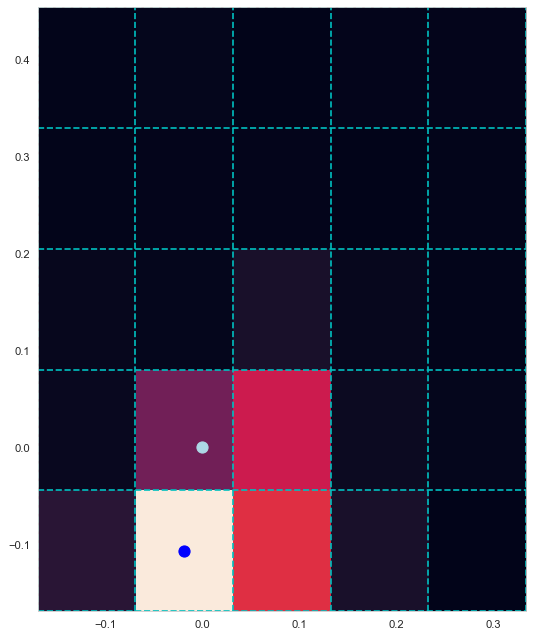

Maximum Value:223.0
New Startpoint x: -0.01861169999999923, y: -0.1066871999999762


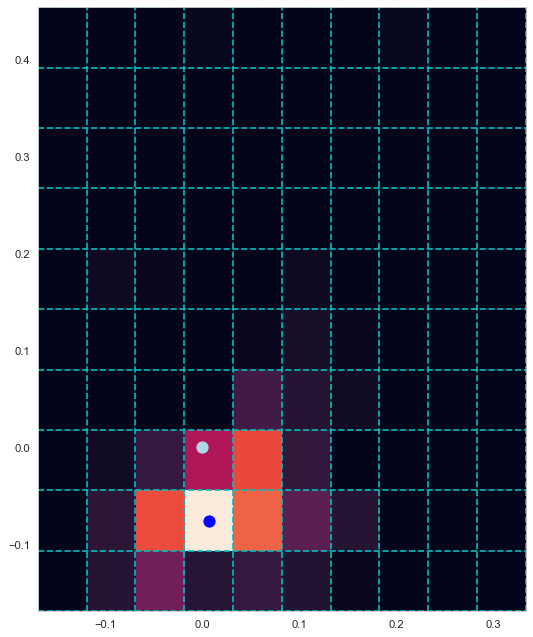

Maximum Value:110.0
New Startpoint x: 0.006517850000000713, y: -0.07558529999997746


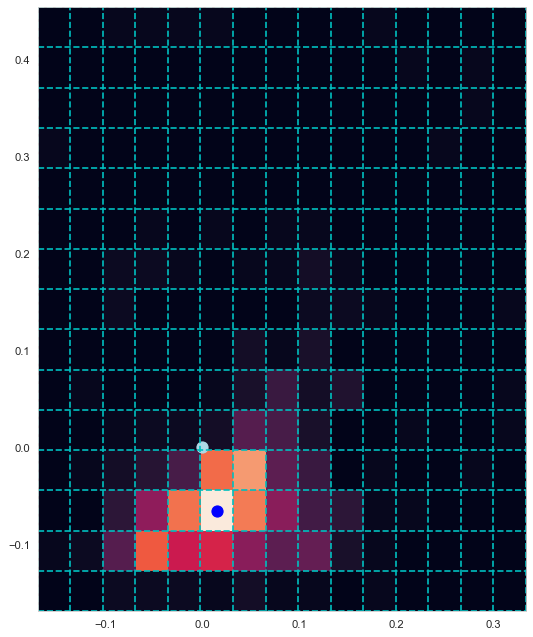

Maximum Value:58.0
New Startpoint x: 0.014894366666667352, y: -0.06521799999997788


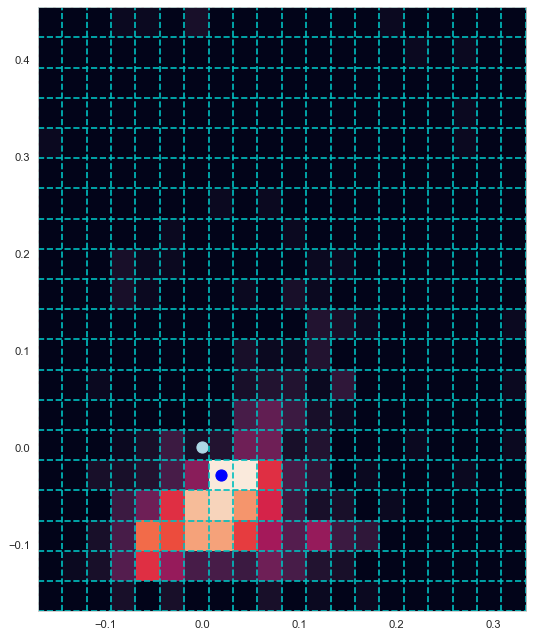

Maximum Value:32.0
New Startpoint x: 0.019082625000000686, y: -0.028932449999979327


In [97]:
# Raster with 5x5 (bins = 5)
raster(5)

# Raster with 10x10 (bins = 10)
raster(10)

# Raster with 15x15 (bins = 15)
raster(15)

# Raster with 20x20 (bins = 20)
raster(20)